In [2]:
# Install dependencies 
from rocketpy import Environment, SolidMotor, Rocket, Flight, Function
import pandas as pandas
# from helper import drogueTrigger, mainTrigger

In [3]:
## csv parser for drag files -----------------------------------------
df = pandas.read_csv("PowerDrag/Kong/Kong_data.CSV")     # RasAero aero plot csv to be parsed
# How to get csv file for drag:
# 1. Import rocket into RasAero by exporting your openRocket model as a CDX1 file
# 2. Select engine you want to use under file -> select motor file (if the motor was not imported with the openRocket model)
# 3. Run a flight simulation using the flight simulation button and using the motor selected
# 4. Click Aero Plots and export as a .csv
# 5. Move .csv file into PowerDrag/[folder] replacing folder with where you want to store it
# Other questions can be answered here: https://www.rasaero.com/ with the user manual

# -----------------Do not modify below this line------------------
mach_number = df['Mach']                             # Store mach and drag columns
poweroff_drag = df['CD Power-Off']
poweron_drag = df['CD Power-On']

poweroff_data = {
    'mach_number' : mach_number,
    'poweroff_drag' : poweroff_drag
}
poweron_data = {
    'mach_number' : mach_number,
    'poweron_drag' : poweron_drag
}

poweroff_df = pandas.DataFrame(poweroff_data)
poweron_df = pandas.DataFrame(poweron_data)
# -----------------Do not modify above this line------------------

poweroff_df.to_csv("PowerDrag/Kong/KongPowerOff.csv", index=False, header=False)   # modify this and line below to change path csv is saved to
poweron_df.to_csv("PowerDrag/Kong/KongPowerOn.csv", index=False, header=False)


In [4]:
# Variables to modify
# Do NOT modify values in cells below this cell if you don't know what you're doing!

## Environment Variables ------------------------------------------------------------
# Unit: meter
rail_length = 5.2

launch_latitude = 32.990254
launch_longitude = -106.974998
launch_elevation = 1400

launch_year = 2023
launch_month = 7
launch_day = 22
launch_hour = 12
launch_minute = 0


## Motor Variables  ------------------------------------------------------------------

# choose constant or non-constant thrust source
is_constant = False # switch to "False" if not constant
constant_thurst_source = 1890
non_constant_thrust_source_file_path="EngFiles/Kong_M1890.csv" # can be found online/exported from burnsim or ThrustCurve.org as .eng or .csv
                                                               # Remove any extra labels or discriptions in .csv, leave only numbers so it is read correctly
# other variables
burnout = 4.341 # given by manufacturer (Unit: s)

grain_number = 4 # motor type
grain_separation = 6 / 1000 # Distance between two grains in meters # standard o-ring size
grain_density = 5300 / 4    # grain mass/motor volume # (total mass/volume)/grain number (Unit: kg/meters cubed)
grain_outer_radius= 49 / 1000 # measure # Unit: m
grain_initial_innerRadius = 25.4 / 1000 # Unit: m
grain_initial_height = 152.4 / 1000 # the total length of the motor/num of grain # Unit: m

nozzle_radius = 23.8 / 1000 # the radius of the widest part # Unit: m
throat_radius = 11 / 1000 # the thinnest radius # Unit: m
interpolation_method = "linear" # options: linear, spline, or akima


## Rocket Variables -----------------------------------------------------------------
# rocket
radius = 0.0795 # Unit: m
mass = 31.595 # kg
inertia_i = 19 # hollow cylinder x-axis # 1/2(M)(outer radius - inner radius)^2
inertia_z = 0.132 # (M)(outer radius - inner radius)^2
center_of_mass = 1.72
distance_rocket_nozzle = -(3.2 - center_of_mass) # where the nozzle ends - center of mass
distance_rocket_propellant = -(2.749 - center_of_mass) # (tip of the nosecone + total length of motor/2)-center of mass
power_off_drag = "PowerDrag/Kong/KongPowerOff.csv" # int or csv file of the rocket's drag coefficient and mach number
power_on_drag = "PowerDrag/Kong/KongPowerOn.csv" # int or csv file of the rocket's drag coefficient and mach number
# edit the above two lines to direct it to the files named/ saved in the second code cell for drag

# launch rail
rail_button_x = (2.8 - 1.72)
rail_button_y = -(2 - 1.72)
rail_inclination = 90
rail_heading = 0

# nose cone
nc_length = 0.889
nc_kind = "ogive" # options are vonKarman, conical, ogive, and lvhaack
nc_distance_to_cm = (1.72 - 0.889)

# fin set
fs_num = 4
fs_span = 0.147
fs_root_chord = 0.305
fs_tip_chord = 0.762
fs_distance_to_cm = -(2.71 - 1.72)

# tail
tail_top_radius = 0.159 / 2
tail_bottom_radius = 0.106 / 2
tail_length = 0.181
tail_distance_to_cm = -(3.02 - 1.72)

# main parachute
main_cds = 10

# drogue parachute
drogue_cds = 1



Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length: 5.2  m
Launch Date: 2023-07-22 17:00:00 UTC | 2023-07-22 12:00:00 EST
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Launch Site Surface Elevation: 1400.0 m


Atmospheric Model Details

Atmospheric Model Type: CustomAtmosphere
CustomAtmosphere Maximum Height: 1.600 km


Surface Atmospheric Conditions

Surface Wind Speed: 10.24 m/s
Surface Wind Direction: 257.69°
Surface Wind Heading: 77.69°
Surface Pressure: 855.99 hPa
Surface Temperature: 279.05 K
Surface Air Density: 1.069 kg/m³
Surface Speed of Sound: 334.54 m/s


Atmospheric Model Plots


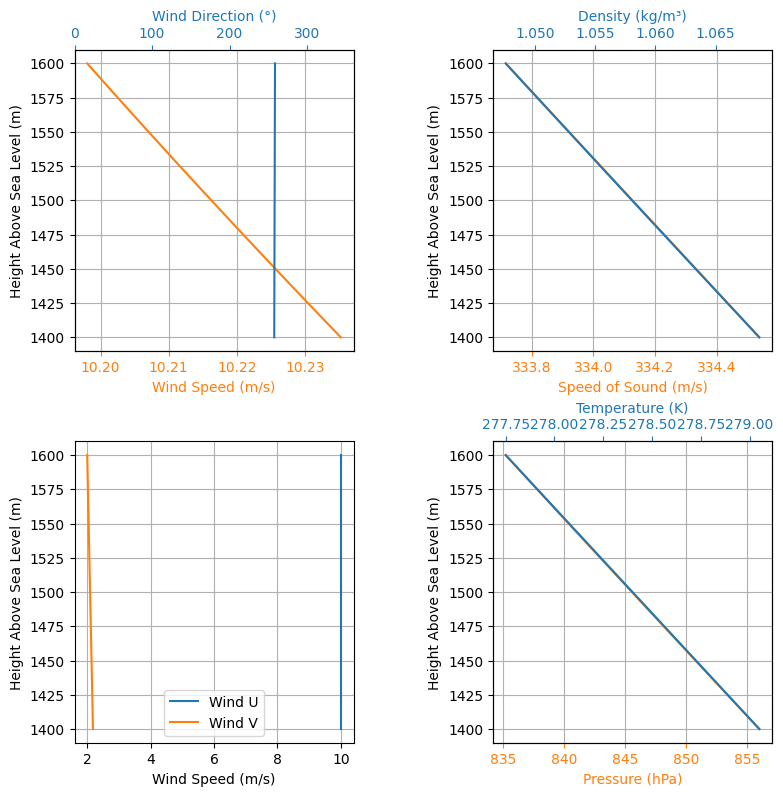

In [5]:
# -------------------------------------------------------------------------------------------------
# Environment
# -------------------------------------------------------------------------------------------------

## Running Environment Analysis (Do Not Modify) ----------------------------------------------------
Env = Environment(
    railLength=rail_length, latitude=launch_latitude, longitude=launch_longitude, elevation=launch_elevation
)
Env.setDate((launch_year, launch_month, launch_day, launch_hour, launch_minute), timeZone='EST')
# wind speed in m/s
Env.setAtmosphericModel(type='CustomAtmosphere',pressure=None,wind_u=[(0,5), (1000, 10)], wind_v=[(0,-2), (500,3),(1600,2)])
Env.allInfo()


Nozzle Details
Nozzle Radius: 0.0238 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 4
Grain Spacing: 0.006 m
Grain Density: 1325.0 kg/m3
Grain Outer Radius: 0.049 m
Grain Inner Radius: 0.0254 m
Grain Height: 0.1524 m
Grain Volume: 0.001 m3
Grain Mass: 1.114 kg

Motor Details
Total Burning Time: 4.341 s
Total Propellant Mass: 4.455 kg
Propellant Exhaust Velocity: 2211.200 m/s
Average Thrust: 2269.519 N
Maximum Thrust: 2240.13 N at 1.7 s after ignition.
Total Impulse: 9851.983 Ns

Plots


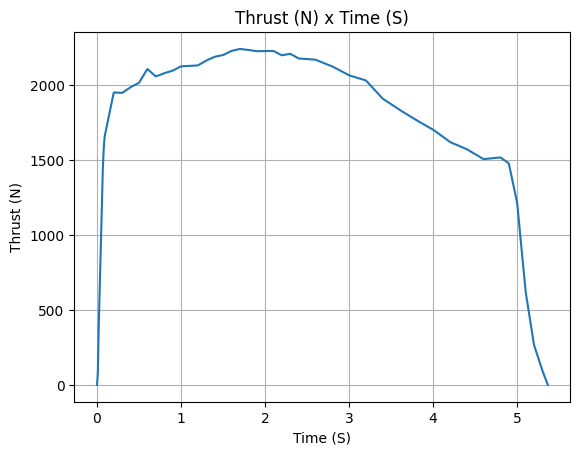

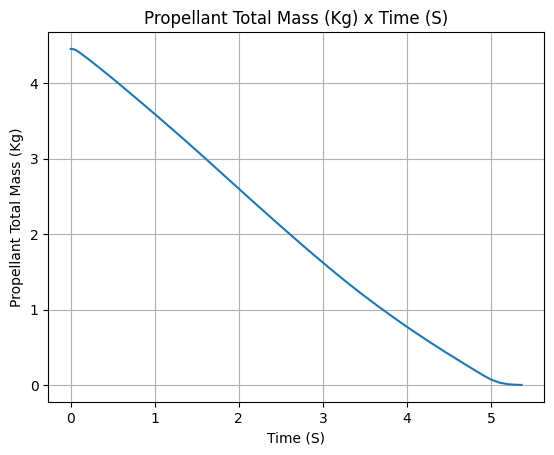

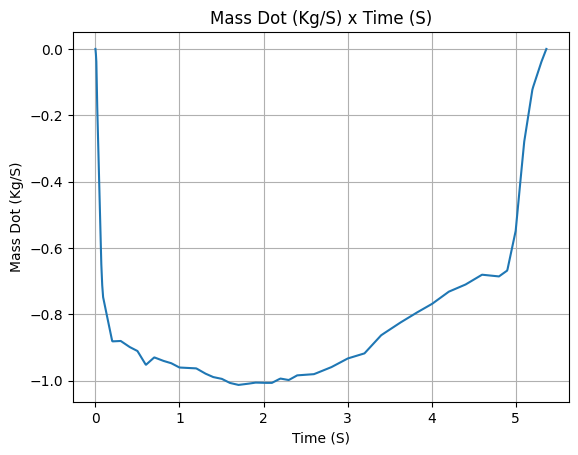

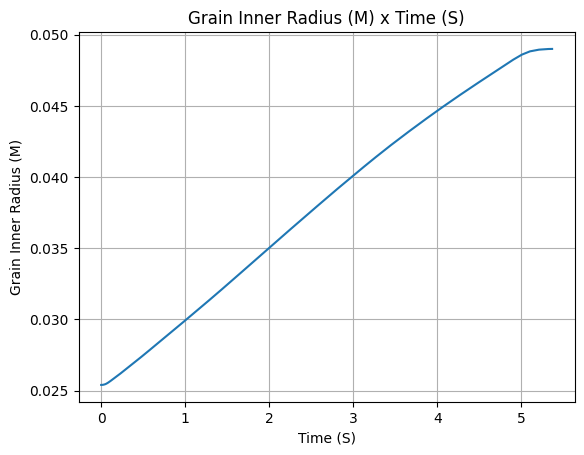

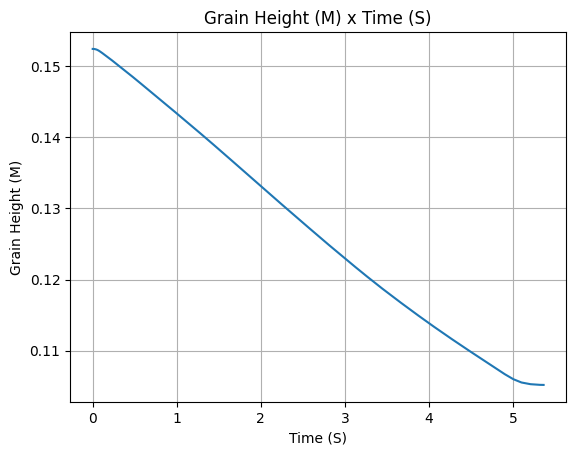

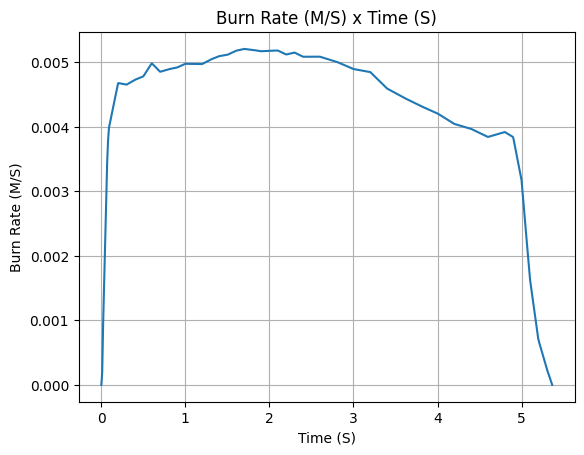

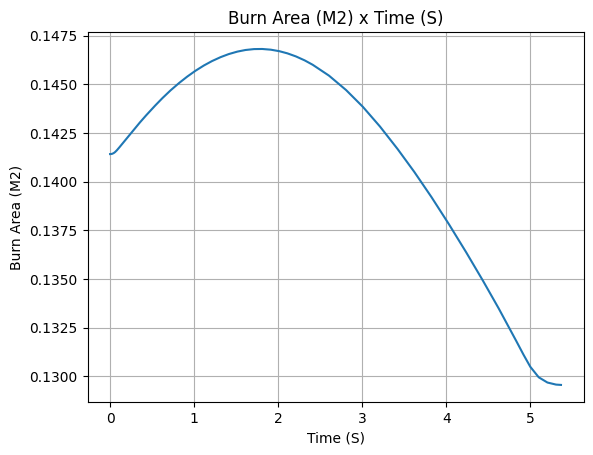

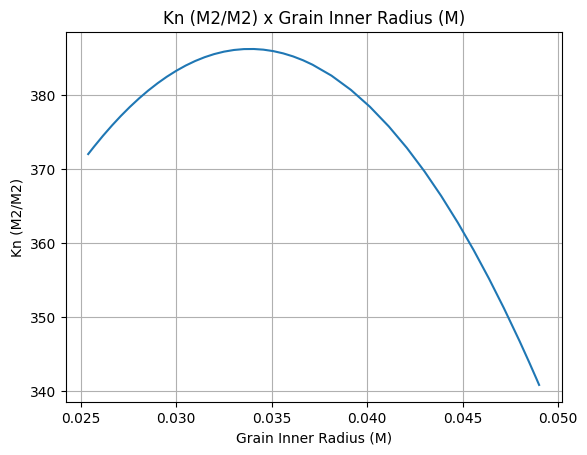

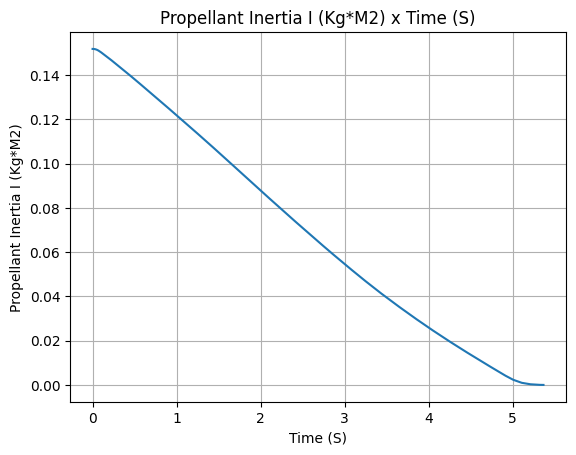

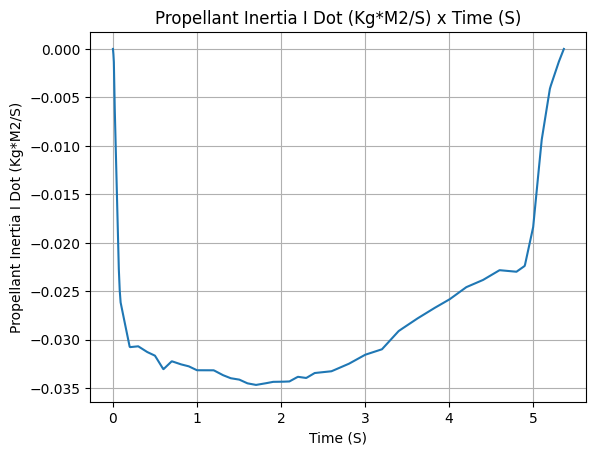

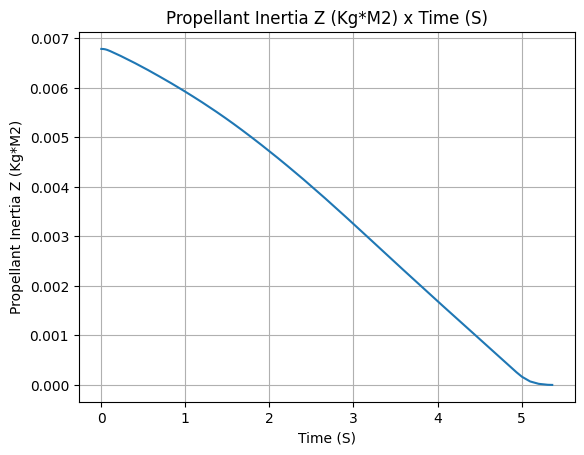

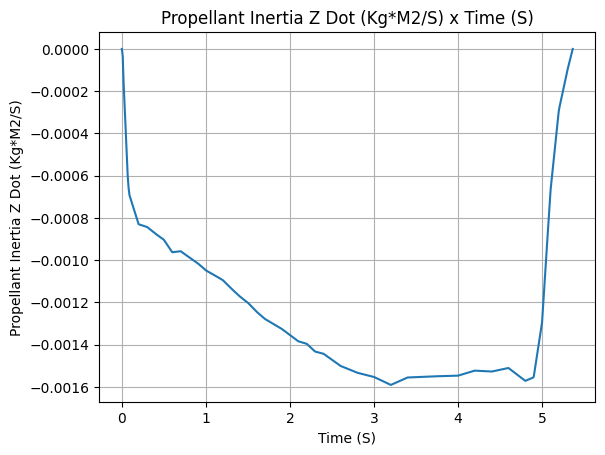

In [6]:
# -------------------------------------------------------------------------------------------------
# Motor
# https://github.com/Projeto-Jupiter/RocketPy/blob/master/docs/notebooks/solid_motor_class_usage.ipynb
# -------------------------------------------------------------------------------------------------

## Running Motor Analysis (Do Not Modify) ---------------------------------------------------------
# initialize the motor
motor = ''

if is_constant == True:
    motor = SolidMotor(
        thrustSource=constant_thurst_source,
        burnOut=burnout,
        grainNumber=grain_number,
        grainSeparation=grain_separation,
        grainDensity=grain_density,
        grainOuterRadius=grain_outer_radius,
        grainInitialInnerRadius=grain_initial_innerRadius,
        grainInitialHeight=grain_initial_height,
        nozzleRadius=nozzle_radius,
        throatRadius=throat_radius,
        interpolationMethod=interpolation_method,
    )
else:
    motor = SolidMotor(
        thrustSource=non_constant_thrust_source_file_path,
        burnOut=burnout,
        grainNumber=grain_number,
        grainSeparation=grain_separation,
        grainDensity=grain_density,
        grainOuterRadius=grain_outer_radius,
        grainInitialInnerRadius=grain_initial_innerRadius,
        grainInitialHeight=grain_initial_height,
        nozzleRadius=nozzle_radius,
        throatRadius=throat_radius,
        interpolationMethod=interpolation_method,
    )

motor.allInfo()

This may be caused by more than when parachute being triggered simultaneously.
Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1400.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 1.000 | e1: 0.000 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 180.00° | Nutation θ: -0.00° | Precession ψ: -180.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 90.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 2.18 m/s
Lateral Surface Wind Speed: -10.00 m/s


 Rail Departure State

Rail Departure Time: 0.410 s
Rail Departure Velocity: 15.267 m/s
Rail Departure Static Margin: 1.576 c
Rail Departure Angle of Attack: 33.838°
Rail Departure Thrust-Weight Ratio: 5.672
Rail Departure Reynolds Number: 2.922e+00


BurnOut State

BurnOut time: 4.341 s
Altitude at burnOut: 445.395 m (AGL)
Rocket velocity at burnOut: 205.991 m/s
Freestream velocity at burnOut: 208.484 

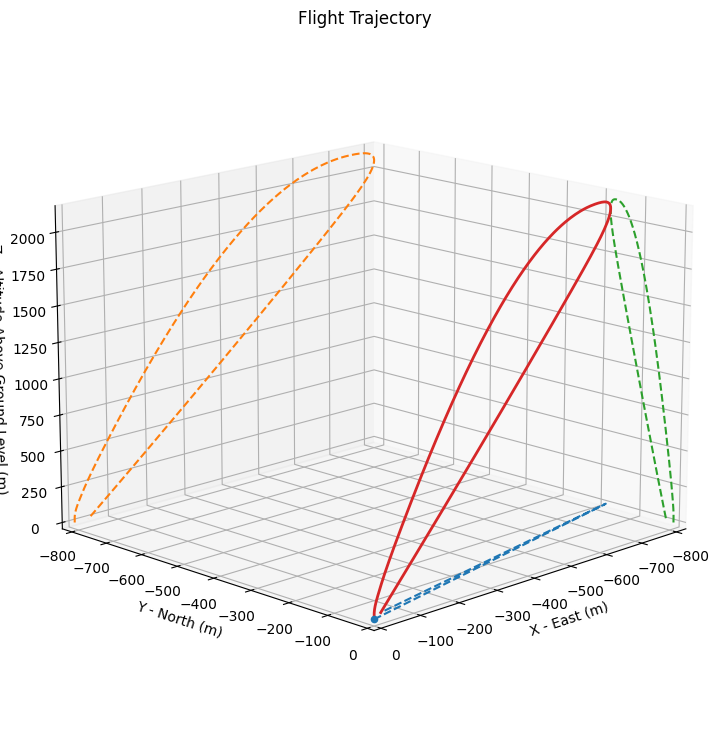



Trajectory Kinematic Plots



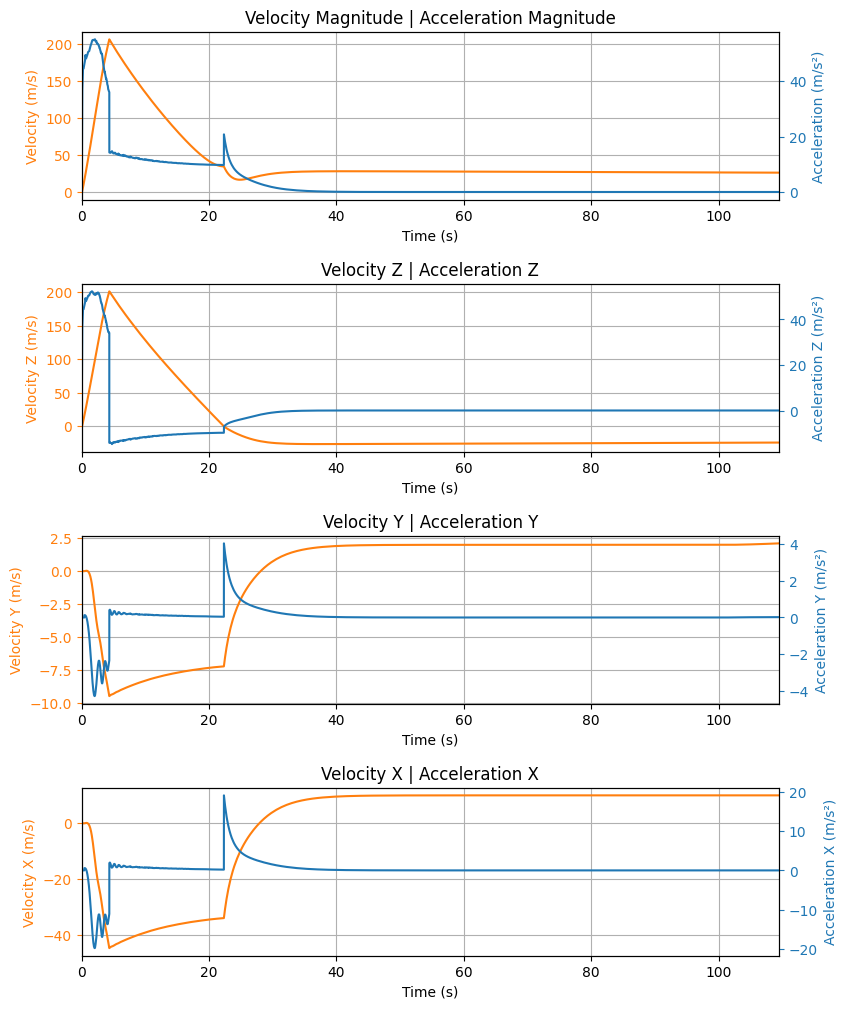



Angular Position Plots



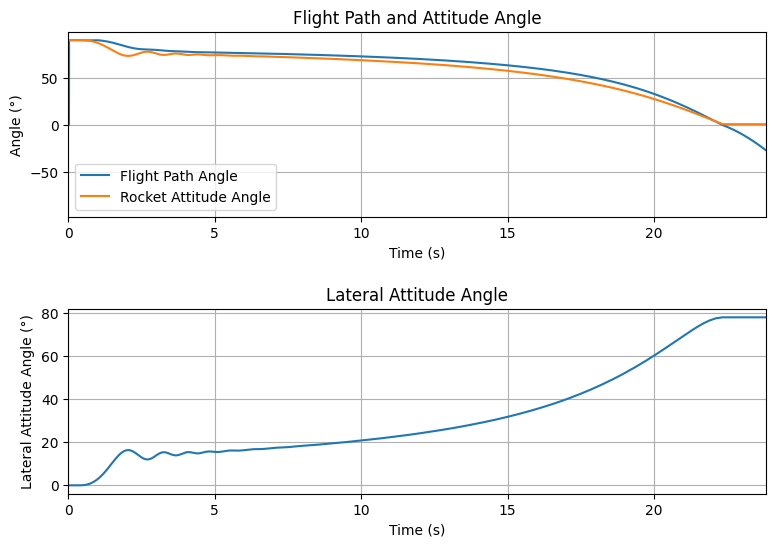



Path, Attitude and Lateral Attitude Angle plots



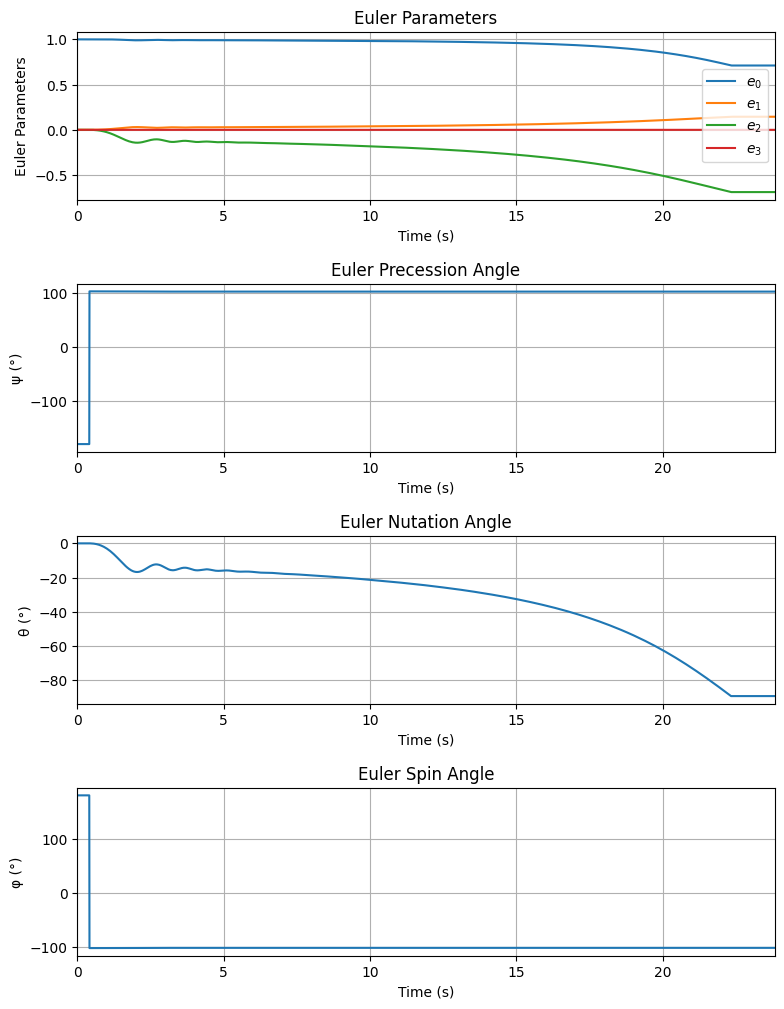



Trajectory Angular Velocity and Acceleration Plots



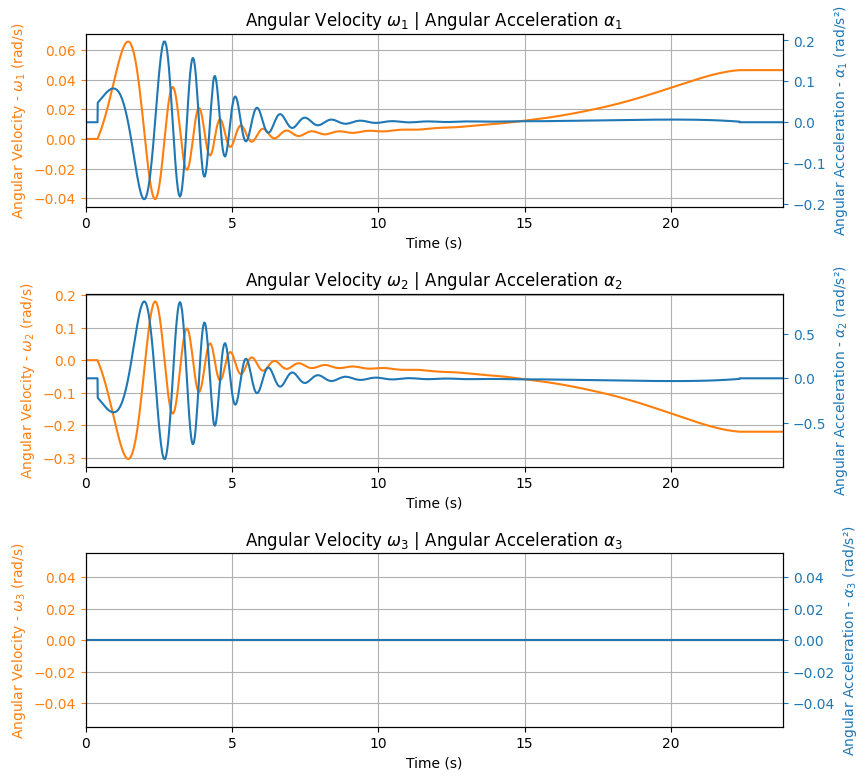



Trajectory Force Plots



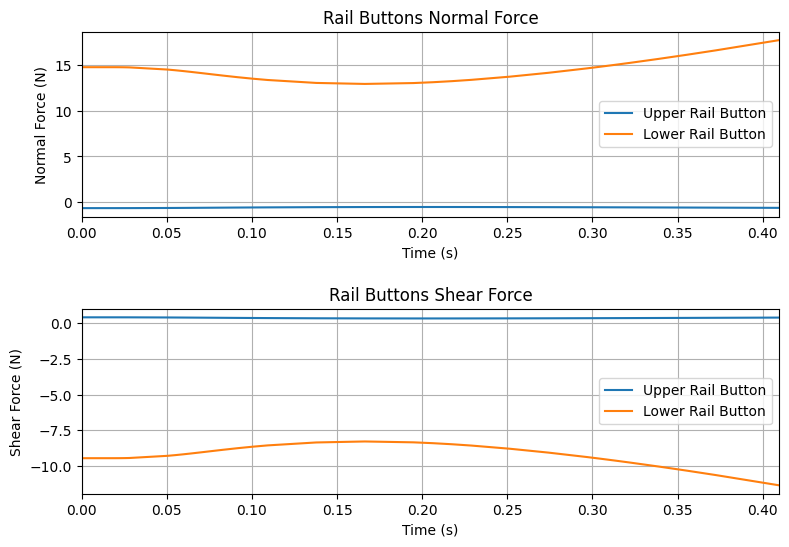

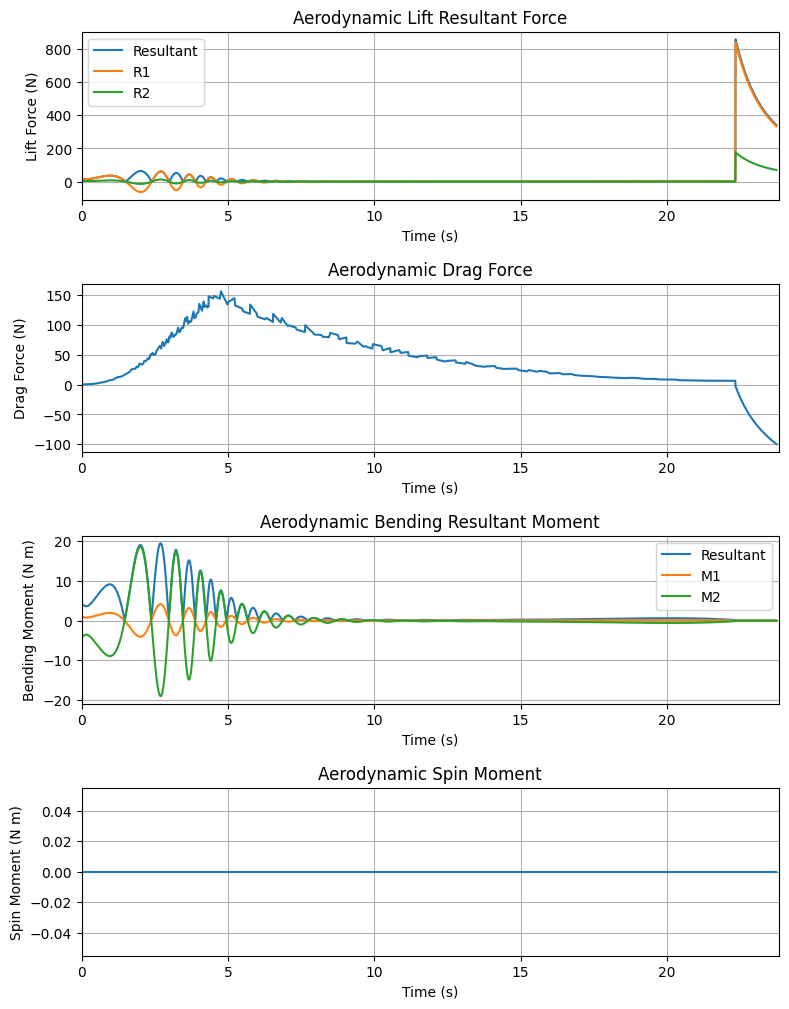



Trajectory Energy Plots



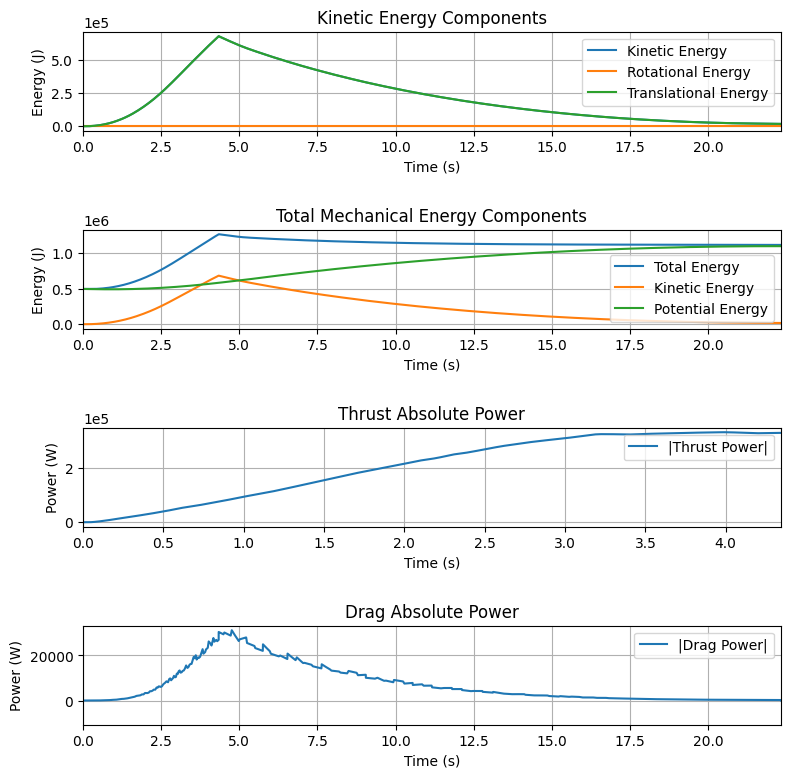



Trajectory Fluid Mechanics Plots



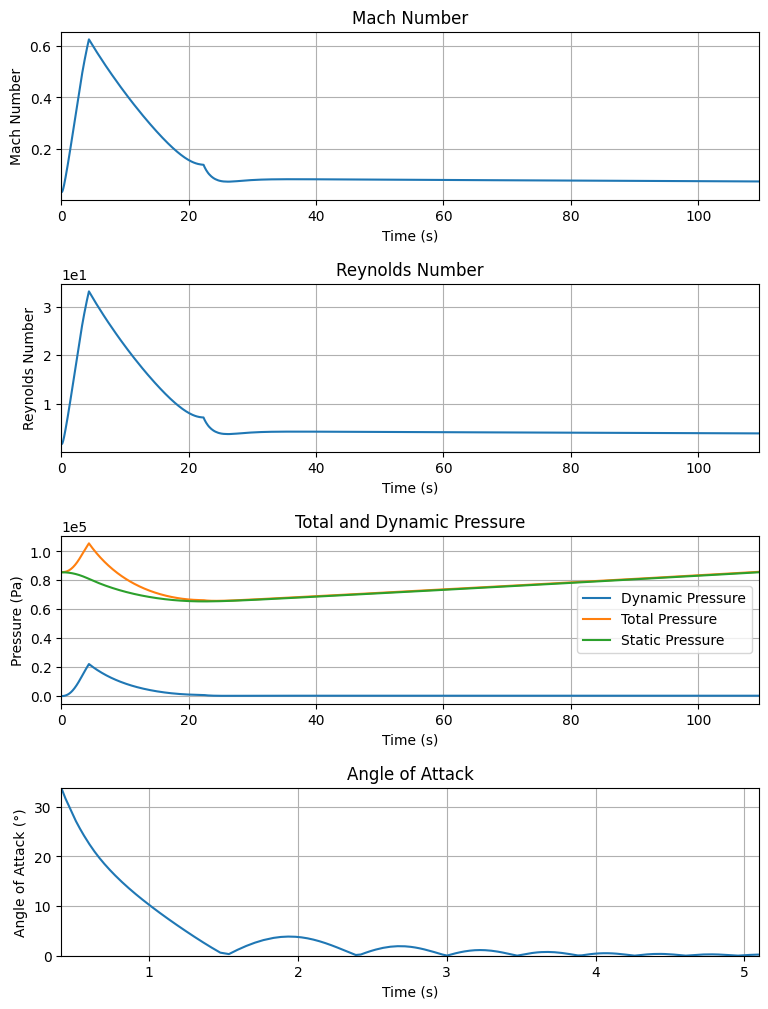



Trajectory Stability and Control Plots



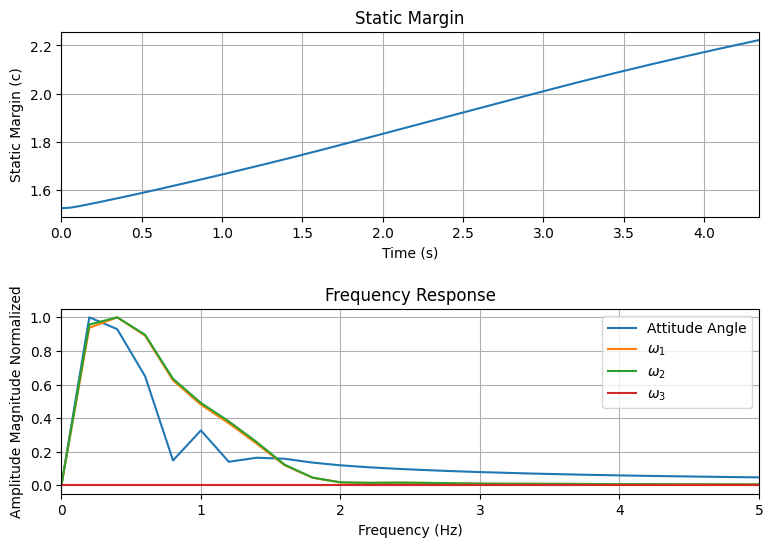

In [7]:
# -------------------------------------------------------------------------------------------------
# Rocket
# Documentations: https://docs.rocketpy.org/en/latest/reference/classes/Rocket.html
# -------------------------------------------------------------------------------------------------

## Running Rocket Analysis (Do Not Modify) --------------------------------------------------------

# initialize rocket
rocket = Rocket(
    motor=motor,
    radius=radius,
    mass=mass,
    inertiaI=inertia_i,
    inertiaZ=inertia_z,
    distanceRocketNozzle=distance_rocket_nozzle,
    distanceRocketPropellant=distance_rocket_propellant,
    powerOffDrag=power_off_drag,
    powerOnDrag=power_on_drag
)

rocket.setRailButtons([rail_button_x, rail_button_y])

# nose cone
nosecone = rocket.addNose(length=nc_length, kind=nc_kind, distanceToCM=nc_distance_to_cm)
# fin sets
fins = rocket.addFins(fs_num, span=fs_span, rootChord=fs_root_chord, tipChord=fs_tip_chord, distanceToCM=fs_distance_to_cm)
# tail
tail = rocket.addTail(topRadius=tail_top_radius, bottomRadius=tail_bottom_radius, length=tail_length, distanceToCM=tail_distance_to_cm)
# I don't know how to work helper, so this will have to suffice.
def drogueTrigger(p, y):
    return True if y[5] < 0 else False
def mainTrigger(p, y):
    return True if y[5] < 0 and y[2] < 800 else False
Main = rocket.addParachute('Main',
                            CdS=10.0,
                            trigger=mainTrigger,
                            samplingRate=105,
                            lag=1.5,
                            noise=(0, 8.3, 0.5))
Drogue = rocket.addParachute('Drogue',
                              CdS=1.0,
                              trigger=drogueTrigger,
                              samplingRate=105,
                              lag=1.5,
                              noise=(0, 8.3, 0.5))
# parachutes
main = rocket.addParachute("Main", CdS=main_cds, trigger=mainTrigger)
drogue = rocket.addParachute("Drogue", CdS=drogue_cds, trigger=drogueTrigger)

# test flight
test_flight = Flight(rocket=rocket, environment=Env, inclination=rail_inclination, heading=rail_heading)
test_flight.allInfo()


Simulating Rocket with Static Margin of 2.348->3.043 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 2.667->3.362 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 2.986->3.681 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 3.305->4.000 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 3.624->4.319 c
Simulation Completed at Time: 5.0000 s


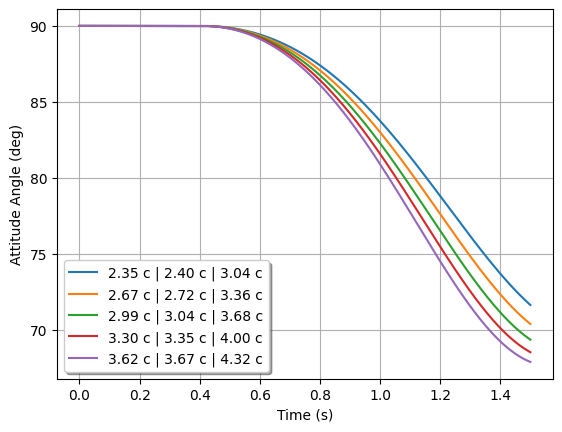

In [8]:
# -------------------------------------------------------------------------------------------------
# Dynamic Stability Analysis
# -------------------------------------------------------------------------------------------------
sim_rocket = rocket

simulation_results = []

for factor in [0.5, 0.7, 0.9, 1.1, 1.3]:
    # Modify rocket fin set by removing previous one and adding new one
    sim_rocket.aerodynamicSurfaces.pop()
    FinSet = sim_rocket.addFins(
        4, span=0.1, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956 * factor
    )
    # Simulate
    print(
        "Simulating Rocket with Static Margin of {:1.3f}->{:1.3f} c".format(
            sim_rocket.staticMargin(0), sim_rocket.staticMargin(sim_rocket.motor.burnOutTime)
        )
    )
    TestFlight = Flight(
        rocket=sim_rocket,
        environment=Env,
        inclination=90,
        heading=0,
        maxTimeStep=0.01,
        maxTime=5,
        terminateOnApogee=True,
        verbose=True,
    )
    # Post process flight data
    TestFlight.postProcess()
    # Store Results
    staticMarginAtIginition = sim_rocket.staticMargin(0)
    staticMarginAtOutOfRail = sim_rocket.staticMargin(TestFlight.outOfRailTime)
    staticMarginAtSteadyState = sim_rocket.staticMargin(TestFlight.tFinal)
    simulation_results += [
        (
            TestFlight.attitudeAngle,
            "{:1.2f} c | {:1.2f} c | {:1.2f} c".format(
                staticMarginAtIginition,
                staticMarginAtOutOfRail,
                staticMarginAtSteadyState,
            ),
        )
    ]

Function.comparePlots(
    simulation_results,
    lower=0,
    upper=1.5,
    xlabel="Time (s)",
    ylabel="Attitude Angle (deg)",
)